Ising Metropolis Module Playground

In [1]:
import ising_metropolis as im 
import matplotlib.pyplot as plt

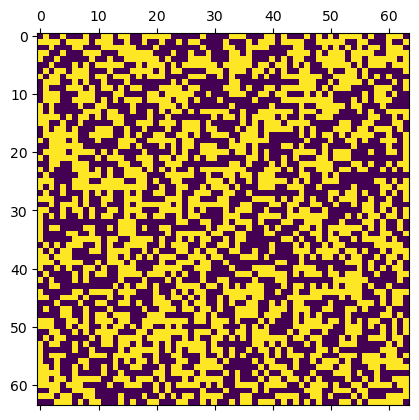

In [2]:
random_grid = im.create_random_grid(grid_shape=(64,64))
plt.matshow(random_grid);

In [3]:
random_grid.sum()

-32

In [4]:
random_spin_coordinates= im.select_random_spin(random_grid)

Selected spin:  (63, 3)


In [5]:
random_spin_coordinates

[63, 3]

In [6]:
L = random_grid.shape[0]
total_energy=0.0
J=1
for i in range(L):
    for j in range(L):
        right = (i+1)%L 
        down = (j+1)%L
        total_energy -= J*random_grid[i,j]*(random_grid[right,j]+random_grid[i,down])

total_energy

-20.0

In [7]:
grid, energies, magnetizations = im.metropolis_sweep(random_grid, T=1, J=1, n_steps=100, sample_interval=10)

Step:  0
Selected spin:  (10, 58)

 Calculated energy diff for spin in coordinates  [10, 58]  is  4

 exp(-energy_diff/T)<x, decided NOT TO FLIP
Step:  1
Selected spin:  (15, 21)

 Calculated energy diff for spin in coordinates  [15, 21]  is  -4

 Energy difference is less than 0, decided TO FLIP
Step:  2
Selected spin:  (21, 60)

 Calculated energy diff for spin in coordinates  [21, 60]  is  0

 Energy difference is less than 0, decided TO FLIP
Step:  3
Selected spin:  (11, 55)

 Calculated energy diff for spin in coordinates  [11, 55]  is  -4

 Energy difference is less than 0, decided TO FLIP
Step:  4
Selected spin:  (20, 44)

 Calculated energy diff for spin in coordinates  [20, 44]  is  0

 Energy difference is less than 0, decided TO FLIP
Step:  5
Selected spin:  (47, 2)

 Calculated energy diff for spin in coordinates  [47, 2]  is  4

 exp(-energy_diff/T)<x, decided NOT TO FLIP
Step:  6
Selected spin:  (55, 26)

 Calculated energy diff for spin in coordinates  [55, 26]  is  4

 

In [8]:
grid, energies, magnetizations

(array([[-1,  1, -1, ...,  1,  1, -1],
        [ 1,  1,  1, ..., -1, -1,  1],
        [-1, -1,  1, ...,  1,  1, -1],
        ...,
        [-1, -1,  1, ..., -1, -1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [-1, -1, -1, ...,  1,  1, -1]]),
 array([ -20.,  -24.,  -36.,  -48.,  -64.,  -72.,  -84., -104., -116.,
        -132.]),
 array([-32., -28., -24., -32., -20., -28., -32., -30., -38., -32.]))

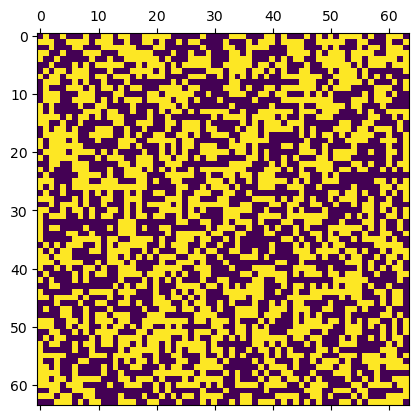

In [9]:
plt.matshow(grid);

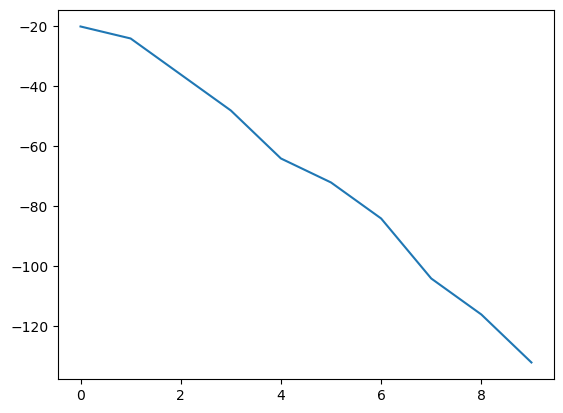

In [10]:
plt.plot(energies)

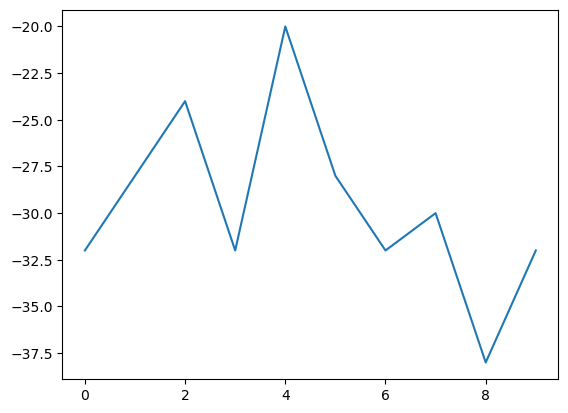

In [11]:
plt.plot(magnetizations)

In [12]:
# After running your metropolis_sweep
grid, energies, magnetizations = im.metropolis_sweep(grid, T=2.27, J=1.0, n_steps=10000)

# Calculate specific heat
L = grid.shape[0]
N = L * L
C_v = im.calculate_specific_heat(energies, T=2.27, N=N)
print(f"Specific heat per spin: {C_v:.4f}")

# Calculate autocorrelation
energy_autocorr, lags = im.autocorrelation_function(energies)
tau_energy = im.integrated_autocorr_time(energy_autocorr)
print(f"Energy autocorrelation time: {tau_energy:.2f}")

Step:  0
Selected spin:  (39, 5)

 Calculated energy diff for spin in coordinates  [39, 5]  is  8.0

 exp(-energy_diff/T)<x, decided NOT TO FLIP
Step:  1
Selected spin:  (13, 6)

 Calculated energy diff for spin in coordinates  [13, 6]  is  8.0

 exp(-energy_diff/T)<x, decided NOT TO FLIP
Step:  2
Selected spin:  (55, 46)

 Calculated energy diff for spin in coordinates  [55, 46]  is  -0.0

 Energy difference is less than 0, decided TO FLIP
Step:  3
Selected spin:  (22, 59)

 Calculated energy diff for spin in coordinates  [22, 59]  is  -0.0

 Energy difference is less than 0, decided TO FLIP
Step:  4
Selected spin:  (19, 20)

 Calculated energy diff for spin in coordinates  [19, 20]  is  -0.0

 Energy difference is less than 0, decided TO FLIP
Step:  5
Selected spin:  (30, 33)

 Calculated energy diff for spin in coordinates  [30, 33]  is  4.0

 exp(-energy_diff/T)<x, decided NOT TO FLIP
Step:  6
Selected spin:  (3, 34)

 Calculated energy diff for spin in coordinates  [3, 34]  is  0.

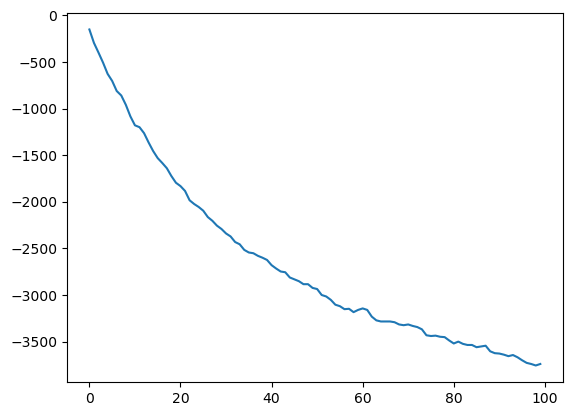

In [13]:
plt.plot(energies)

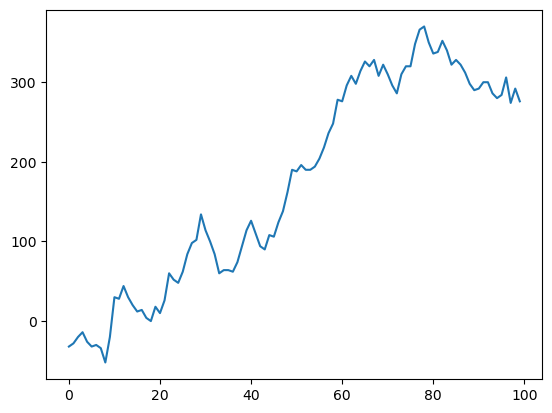

In [14]:
plt.plot(magnetizations)

In [15]:
magnetization_autocorr, lags = im.autocorrelation_function(magnetizations)
tau_magnetization = im.integrated_autocorr_time(magnetization_autocorr)
print(f"Energy autocorrelation time: {tau_magnetization:.2f}")

Energy autocorrelation time: 36.85


In [16]:
im.draw_corrected_connectivity()
print("="*60 + "\n")

im.visualize_corrected_pattern()
print("="*60 + "\n")

im.compare_implementations()
print("="*60 + "\n")

im.test_corrected_implementation()
print("="*60 + "\n")

im.full_corrected_example()

=== CORRECTED TRIANGULAR CONNECTIVITY ===

Odd rows connect to LEFT diagonals:
    •   •   •
   /|   |   |
  • •---•---•  ← Odd row
   \|   |   |
    •   •   •

Even rows connect to RIGHT diagonals:
    •   •   •
    |   |\  |
    •---•---• • ← Even row
    |   |/  |
    •   •   •


=== CORRECTED TRIANGULAR LATTICE PATTERN ===

Site (0, 1) - Row EVEN:
  Cardinal: up(4, 1), down(1, 1), left(0, 0), right(0, 2)
  Diagonals: upper-right(4, 2), lower-right(1, 2)
  All neighbors: [(4, 1), (1, 1), (0, 0), (0, 2), (4, 2), (1, 2)]

Site (1, 1) - Row ODD:
  Cardinal: up(0, 1), down(2, 1), left(1, 0), right(1, 2)
  Diagonals: upper-left(0, 0), lower-left(2, 0)
  All neighbors: [(0, 1), (2, 1), (1, 0), (1, 2), (0, 0), (2, 0)]

Site (2, 2) - Row EVEN:
  Cardinal: up(1, 2), down(3, 2), left(2, 1), right(2, 3)
  Diagonals: upper-right(1, 3), lower-right(3, 3)
  All neighbors: [(1, 2), (3, 2), (2, 1), (2, 3), (1, 3), (3, 3)]

Site (3, 2) - Row ODD:
  Cardinal: up(2, 2), down(4, 2), left(3, 1), right(3